In [1]:
import time as time
import pandas as pd
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
from sorting import hybrid_sort, merge_sort
from comparison_counter import ComparisonCounter

%matplotlib inline
%config InlineBackend.figure_format='retina'

np.random.seed(13)

# Testing the sorting algorithm

In [2]:
arr1 = [14, 40, 31, 28, 3, 15, 17, 51]
arr2 = [23, 23, 23, 23, 23, 23, 23, 23]

In [3]:
comparison_counter = ComparisonCounter()

print(merge_sort(deepcopy(arr1), comparison_counter))
assert comparison_counter.get_count() == 16

comparison_counter.reset_count()
print(merge_sort(deepcopy(arr2), comparison_counter))
assert comparison_counter.get_count() == 12

[3, 14, 15, 17, 28, 31, 40, 51]
[23, 23, 23, 23, 23, 23, 23, 23]


In [4]:
comparison_counter.reset_count()
print(hybrid_sort(deepcopy(arr1), comparison_counter, 4))
assert comparison_counter.get_count() >= 16

comparison_counter.reset_count()
print(hybrid_sort(deepcopy(arr2), comparison_counter, 4))
assert comparison_counter.get_count() == 10

[3, 14, 15, 17, 28, 31, 40, 51]
[23, 23, 23, 23, 23, 23, 23, 23]


# Input generation

In [5]:
sizes = [1000, 10000, 100000, 1000000, 10000000]
inputs = [np.random.randint(1, size + 1, size) for size in sizes]

for i in range(len(inputs)):
    print("Size: ", len(inputs[i]))
    print("Min value:", min(inputs[i]))
    print("Max value:", max(inputs[i]))
    print()

Size:  1000
Min value: 2
Max value: 1000

Size:  10000
Min value: 1
Max value: 9999

Size:  100000
Min value: 1
Max value: 100000

Size:  1000000
Min value: 2
Max value: 1000000

Size:  10000000
Min value: 1
Max value: 10000000



# (c) i: Analyzing Key Comparisons for Different Input Size

In [6]:
np.random.seed(42)

comparison_counter = ComparisonCounter()
sizes = [1000, 10000, 100000, 1000000, 10000000]
inputs = [np.random.randint(1, size + 1, size) for size in sizes]

comparisons = []
execution_times = []

In [7]:
for arr_input in inputs:
    comparison_counter.reset_count()
    arr_copy = arr_input.copy()

    start_time = time.time()
    hybrid_sort(arr_copy, comparison_counter, S=32)
    end_time = time.time()

    comparisons.append(comparison_counter.get_count())
    execution_times.append(end_time - start_time)

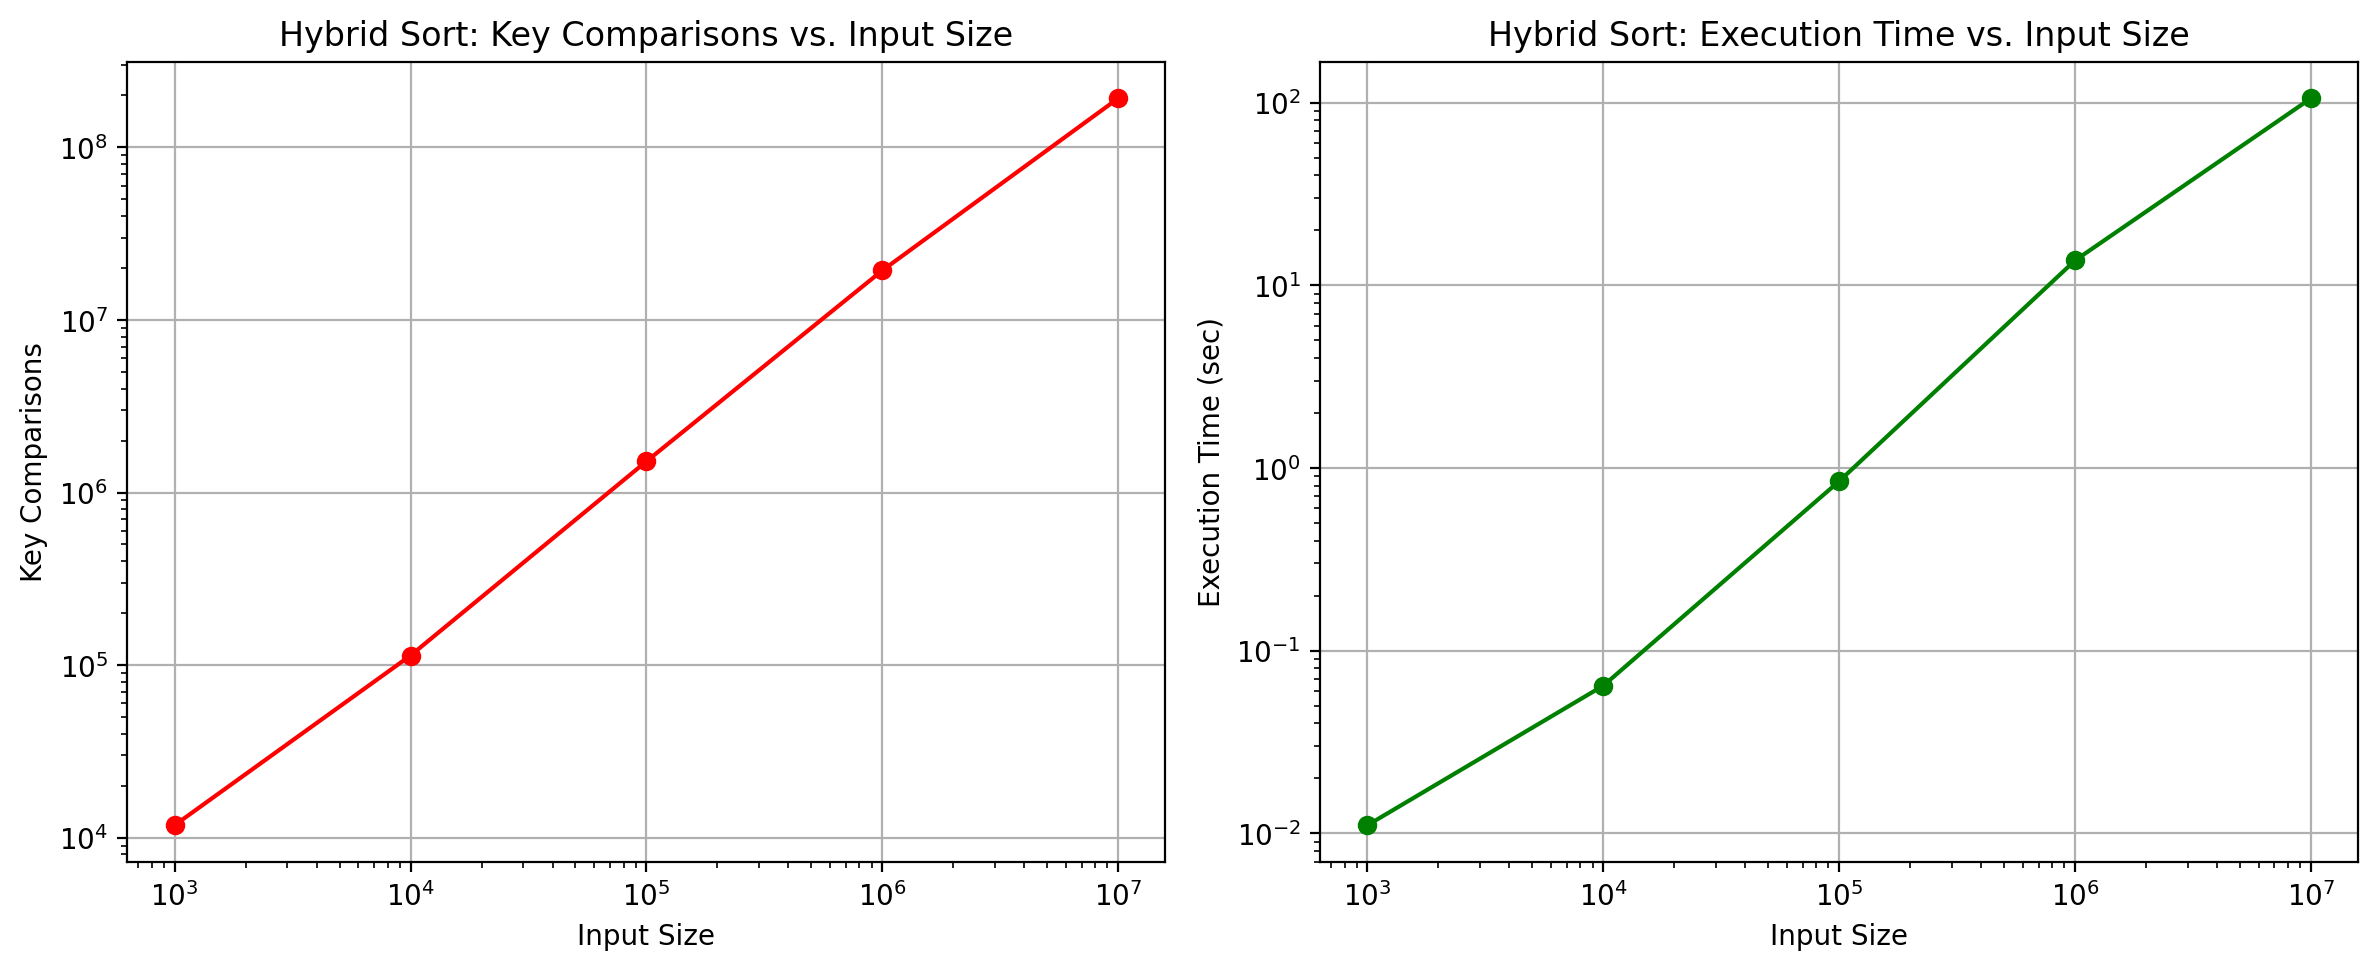

Results of Key Comparisons and Execution Times vs. Input Size:
     Input Size         Key Comparisons    Execution Time (sec)
          1000                11821               0.011063     
         10000               113664               0.064266     
        100000              1515546               0.846455     
       1000000             19336299              13.689719     
      10000000            192223892             105.647256     


In [8]:
# Create a DataFrame
df = pd.DataFrame(
    {
        "Input Size": sizes,
        "Key Comparisons": comparisons,
        "Execution Time (sec)": execution_times,
    }
)

# Plot comparisons and execution time
plt.figure(figsize=(12, 5))

# Plot Key Comparisons vs. Input Size
plt.subplot(1, 2, 1)
plt.plot(df["Input Size"], df["Key Comparisons"], marker="o", linestyle="-", color="r")
plt.xscale("log", base=10)
plt.yscale("log", base=10)
plt.xlabel("Input Size")
plt.ylabel("Key Comparisons")
plt.title("Hybrid Sort: Key Comparisons vs. Input Size")
plt.grid(True)

# Plot Execution Time vs. Input Size
plt.subplot(1, 2, 2)
plt.plot(
    df["Input Size"], df["Execution Time (sec)"], marker="o", linestyle="-", color="g"
)
plt.xscale("log", base=10)
plt.yscale("log", base=10)
plt.xlabel("Input Size")
plt.ylabel("Execution Time (sec)")
plt.title("Hybrid Sort: Execution Time vs. Input Size")
plt.grid(True)

plt.tight_layout()
plt.show()

# Print table
print("Results of Key Comparisons and Execution Times vs. Input Size:")
print(df.to_string(index=False, justify="center", col_space=20))

# (c) ii: Analyzing Key Comparisons for Different S Values

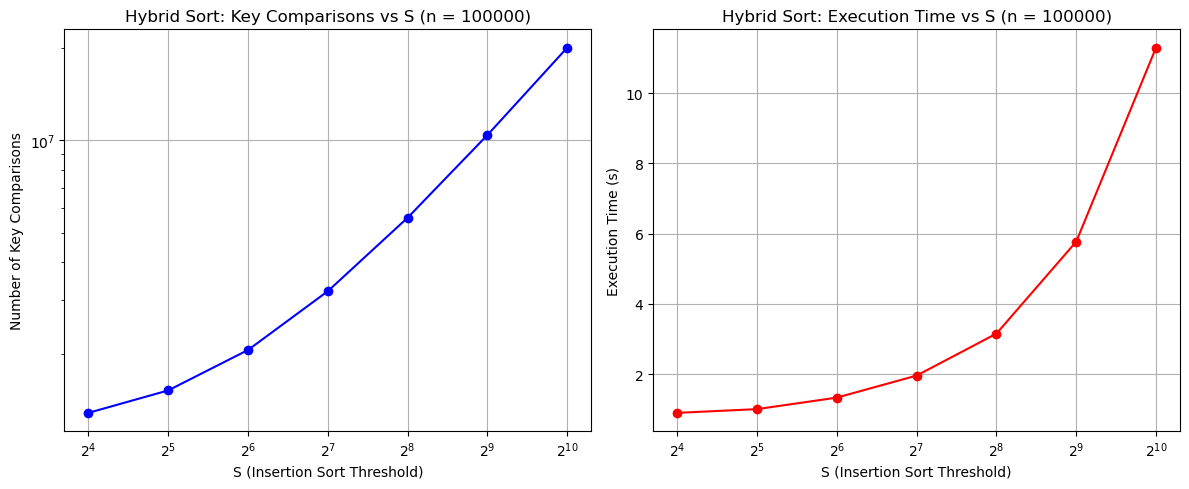

Results of Key Comparisons and Execution Times for Different S Values:
    S (Threshold)       Key Comparisons    Execution Time (sec)
          16                1289176              0.901337      
          32                1526112              1.007271      
          64                2067805              1.335052      
         128                3217387              1.961918      
         256                5589333              3.156269      
         512               10405942              5.773952      
        1024               20071191             11.296585      


In [ ]:
n = 100000  # Fixed input size
np.random.seed(42)
fixed_input = np.random.randint(1, n + 1, n)

S_values = [16, 32, 64, 128, 256, 512, 1024]
comparisons = []
execution_times = []

for S in S_values:
    comparison_counter = ComparisonCounter()
    arr_copy = fixed_input.copy()

    start_time = time.time()
    hybrid_sort(arr_copy, comparison_counter, S)
    end_time = time.time()

    comparisons.append(comparison_counter.get_count())
    execution_times.append(end_time - start_time)

# Create a DataFrame to hold the results
data = {
    "S (Threshold)": S_values,
    "Key Comparisons": comparisons,
    "Execution Time (sec)": execution_times,
}

df = pd.DataFrame(data)

# Plot comparisons
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(S_values, comparisons, marker="o", linestyle="-", color="b")
plt.xscale("log", base=2)
plt.yscale("log", base=10)
plt.xlabel("S (Insertion Sort Threshold)")
plt.ylabel("Number of Key Comparisons")
plt.title(f"Hybrid Sort: Key Comparisons vs S (n = {n})")
plt.grid(True)

# Plot execution time
plt.subplot(1, 2, 2)
plt.plot(S_values, execution_times, marker="o", linestyle="-", color="r")
plt.xscale("log", base=2)
plt.xlabel("S (Insertion Sort Threshold)")
plt.ylabel("Execution Time (s)")
plt.title(f"Hybrid Sort: Execution Time vs S (n = {n})")
plt.grid(True)

plt.tight_layout()
plt.show()

# Print the table
print("Results of Key Comparisons and Execution Times for Different S Values:")
print(df.to_string(index=False, justify="center", col_space=20))

## Comparison of Empirical Results with Theoretical Time Complexity

#### **Theoretical Analysis:**
- **Merge Sort**: O(n log n) — efficient for large arrays, particularly when subarrays are larger.
- **Insertion Sort**: O(n²) — efficient for small subarrays (small `S`).
- **Hybrid Sort**: The algorithm uses Merge Sort for large subarrays and switches to Insertion Sort for small subarrays. There is an optimal threshold (`S`) for efficiency.

#### **Empirical Results:**
With a fixed input size of `n = 100,000`, we observed the following:
- For smaller `S` values (e.g., 16, 32), the algorithm performs well, with fewer comparisons and faster execution. This matches the theoretical expectation that **Insertion Sort** is efficient for small subarrays.
- As `S` increases (e.g., 512, 1024), the number of key comparisons and execution time increase significantly. This is expected because **Insertion Sort** starts to dominate, which is less efficient for larger subarrays.
  
#### **Comparison:**
- The results confirm the theoretical analysis. **Smaller `S` values** (16 to 32) lead to **optimal performance** with fewer comparisons and quicker execution, while **larger `S` values** (512, 1024) cause inefficiency due to the O(n²) behavior of Insertion Sort.
  
#### **Conclusion:**
- **Optimal `S` values:** Choosing an appropriate `S` is critical. Too large an `S` worsens performance due to the inefficiency of Insertion Sort, while too small an `S` may make Merge Sort dominate and slow down performance. Values between 16 and 32 give the best balance, confirming the theoretical analysis.
